In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.random.seed(42)


In [ ]:
num_sample=100

carbon_emissions=np.random.uniform(50,400,num_sample)
energy_output=np.random.uniform(100,1000,num_sample)
renewability_index=np.random.uniform(0,1,num_sample)
cost_efficiency=np.random.uniform(0.5,5,num_sample)

In [ ]:
sustanability=[
    1 if(carbon_emissions <200 and energy_output>500 and renewability_index >0.5 and cost_efficiency <3) else 0
    for carbon_emissions,energy_output,renewability_index,cost_efficiency in zip(carbon_emissions,energy_output,renewability_index,cost_efficiency)

]

In [ ]:
#Create DataFrame
data=pd.DataFrame({
    'carbon_emissions':carbon_emissions,
    'energy_output':energy_output,
    "renewability_index":renewability_index,
    "cost_efficiency":cost_efficiency,
    "sustanability":sustanability
})

In [ ]:
#Display the first few rows
print(data.head())

   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustanability  
0              0  
1              0  
2              0  
3              0  
4              0  


In [ ]:
data.to_csv('green_tech_data.csv',index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load the dataset
data=pd.read_csv('green_tech_data.csv')
#Inspect for missing values and general structure
print(data.head())
print(data.isnull().sum())
#Handle missing values if Necessary
data.fillna(data.mean(),inplace=True)

   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustanability  
0              0  
1              0  
2              0  
3              0  
4              0  
carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustanability         0
dtype: int64


In [ ]:
#Independent varaible
X=data[['carbon_emissions','energy_output','renewability_index','cost_efficiency']] #Feature
#Dependent varaible
Y=data['sustanability'] #Target

In [ ]:
print(X,Y)

    carbon_emissions  energy_output  renewability_index  cost_efficiency
0         181.089042     128.286267            0.642032         0.732568
1         382.750007     672.769370            0.084140         2.891096
2         306.197880     382.920383            0.161629         2.932858
3         259.530469     557.713622            0.898554         3.368435
4         104.606524     916.809827            0.606429         3.767411
..               ...            ...                 ...              ...
95        222.828459     414.288617            0.522243         4.688408
96        232.956490     753.360111            0.769994         4.362857
97        199.639356     907.399234            0.215821         2.430473
98         58.896694     898.377782            0.622890         3.878920
99         87.761999     801.887991            0.085347         3.895443

[100 rows x 4 columns] 0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: sustan

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
#Accuracy Score
accuracy=accuracy_score(Y_test,y_pred)
print("Accuracy :",accuracy)

Accuracy : 0.95


Confusion Matrix:


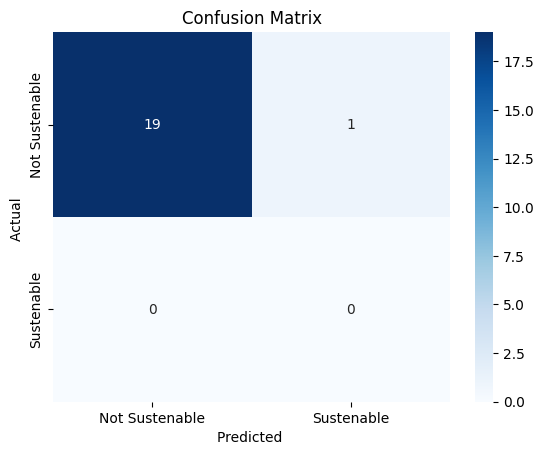

In [ ]:
#Confusion Matrix
conf_matrix=confusion_matrix(Y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Not Sustenable','Sustenable'],
            yticklabels=['Not Sustenable','Sustenable'])
plt.title('Confusion Matrix')
plt.ylabel('Actual ')
plt.xlabel('Predicted ')
print("Confusion Matrix:")
plt.show()

In [ ]:
#Classification  Report
print(classification_report(Y_test,y_pred,target_names=['Not Sustenable','Sustenable']))

                precision    recall  f1-score   support

Not Sustenable       1.00      0.95      0.97        20
    Sustenable       0.00      0.00      0.00         0

      accuracy                           0.95        20
     macro avg       0.50      0.47      0.49        20
  weighted avg       1.00      0.95      0.97        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#load the dataset
data=pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [ ]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
print(data.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [ ]:
print(data.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [ ]:
# The dataset has no missing values, so fillna is not needed.

In [ ]:
X = data[['Age',
          'Sex',
          'Chest pain type',
          'BP',
          'Cholesterol',
          'FBS over 120',
          'EKG results',
          'Max HR',
          'Exercise angina',
          'ST depression',
          'Slope of ST',
          'Number of vessels fluro',
          'Thallium']] #Feature
X = data.drop('Heart Disease', axis=1)
Y = data['Heart Disease']



In [ ]:
print(X,Y)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy=accuracy_score(Y_test,y_pred)
print("Accuracy :",accuracy)

Accuracy : 0.9074074074074074


Confusion Matrix:


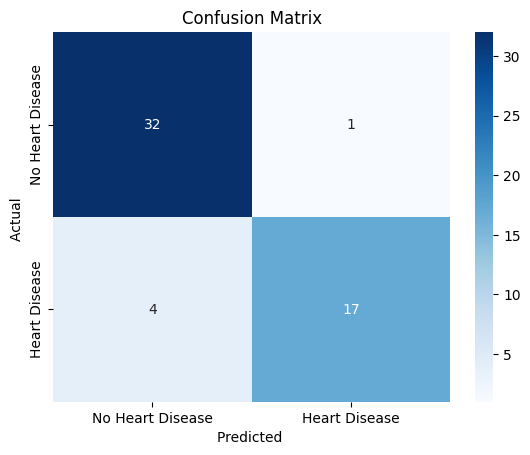

In [ ]:
conf_matrix=confusion_matrix(Y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
            xticklabels=['No Heart Disease','Heart Disease'],
            yticklabels=['No Heart Disease','Heart Disease'])
plt.title('Confusion Matrix')
plt.ylabel('Actual ')
plt.xlabel('Predicted ')
print("Confusion Matrix:")
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred,target_names=['Not Heart Disease','Heart Dieases']))

                   precision    recall  f1-score   support

Not Heart Disease       0.89      0.97      0.93        33
    Heart Dieases       0.94      0.81      0.87        21

         accuracy                           0.91        54
        macro avg       0.92      0.89      0.90        54
     weighted avg       0.91      0.91      0.91        54

